In [75]:
import sys
sys.path.append('..')
from star_functions import *


### 1 = P4VP; 2 = PS; 3 = Solvent

There is one polymer species
Graph does not contain any cycles
Graph does not contain any cycles
Graph does not contain any cycles
Warning Graph contains a cycle
Cycles: [[35, 36, 34], [13, 12, 15, 14], [33, 25, 24, 23, 22, 35, 34], [2, 3, 27, 26, 25, 24, 23, 22, 35, 34, 1], [4, 3, 27, 26, 25, 24, 23, 22, 35, 34, 1]]


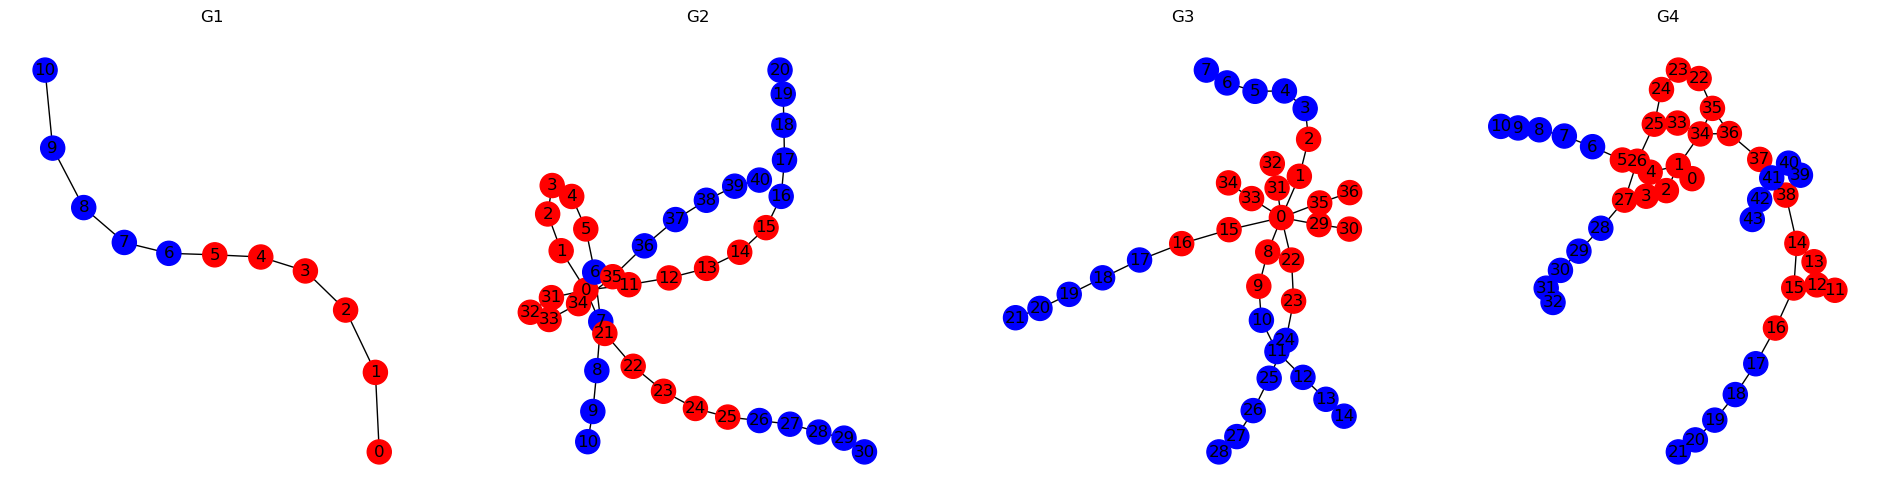

In [76]:
runall = False
Glist_temp = []
Glist_temp.append(create_block_copolymer([6,5],['A','B'],[0, 0]))
Glist_temp.append((create_copolymer_star(6,5,4)))
Glist_temp.append(create_miktoarm_copolymer(3,5,3, 4))
Glist_temp.append(create_copolymer_aggregate(6,5,4,10))

for G in Glist_temp:
    cycles = nx.cycle_basis(G)

    if cycles:
        print("Warning Graph contains a cycle")
        print("Cycles:", cycles)
    else:
        print("Graph does not contain any cycles")

fig = DrawSystem(Glist_temp, {'A':0,'B':1,'S':2},'species')

In [77]:
#    def __init__(self,chiAB, chiAS, polymer_type,Nlist,arms = 5, n_copper = 5):


In [78]:
if runall:
    runner = AdditiveWorkFlow(0.1,0.2,'linear',[45,105])
    fig = runner.DrawSystem()
    phiS_linspace = np.linspace(0.0,1.,15)
    chiBS_linspace = np.linspace(0.2, 1.0, 10)

In [79]:
if runall:
    runner.run(phiS_linspace, chiBS_linspace)
    runner.plot_phase_diagram()
    runner.export_data('linear.dat')

In [80]:
if runall:
    runner = AdditiveWorkFlow(0.1,0.2,'star',[45,105])
    fig = runner.DrawSystem()
    phiS_linspace = np.linspace(0.0,1.,15)
    chiBS_linspace = np.linspace(0.2, 1.0, 10)
    runner.run(phiS_linspace, chiBS_linspace)
    fig2 = runner.plot_phase_diagram()
    runner.export_data('star.dat')

In [81]:
if runall:
    runner = AdditiveWorkFlow(0.1,0.2,'miktoarm',[23,105,22],arms = 5, n_copper = 5)
    fig = runner.DrawSystem()
    phiS_linspace = np.linspace(0.0,1.,15)
    chiBS_linspace = np.linspace(0.2, 1.0, 10)
    runner.run(phiS_linspace, chiBS_linspace)
    fig2 = runner.plot_phase_diagram()
    runner.export_data('mikoarm.dat')



N = 150


/home/timothy/anaconda3/envs/env_main/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(0.1, 1.1)

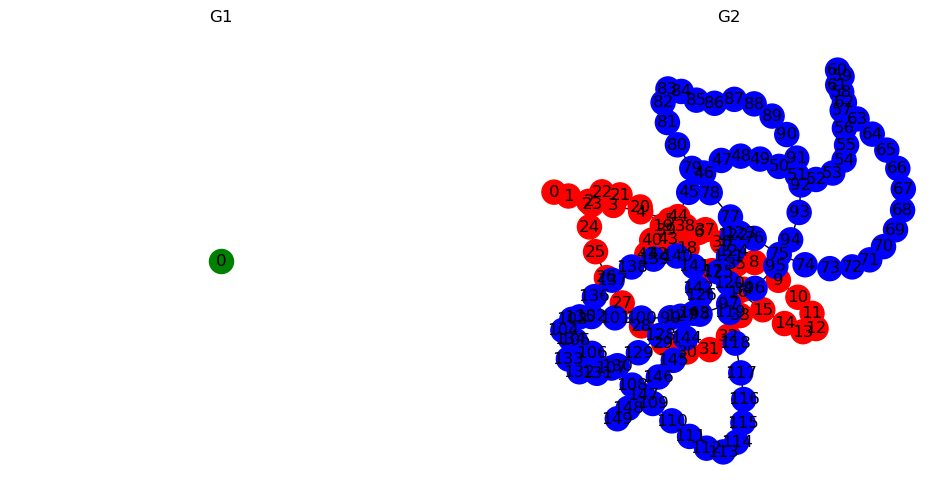

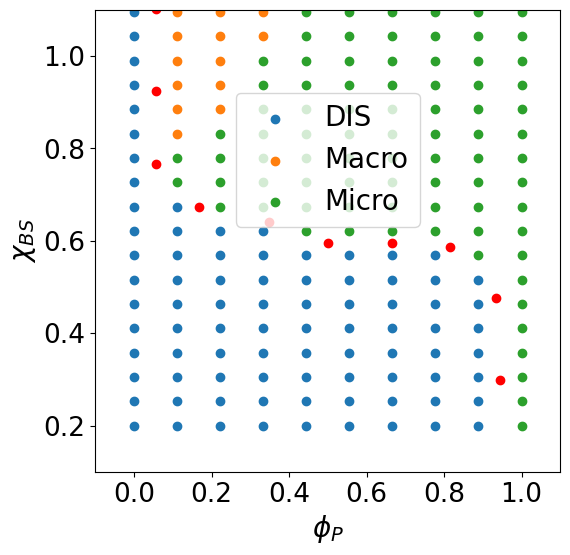

In [82]:
runner = AdditiveWorkFlow(0.1,0.2,'linear',[45,105])
fig = runner.DrawSystem()
phiS_linspace = np.linspace(0.0,1.,10)
chiBS_linspace = np.linspace(0.2, 1.2, 20)
refinement = 10000
n_clusters = 10
max_points = 1000
map_grid = runner.run(phiS_linspace, chiBS_linspace)


fig2 = runner.plot_phase_diagram()
for i in range(refinement):
    midpoint = []
    phase_boundaries,midpoint1 = find_phase_boundaries(map_grid,b_allboundary = False,class_1 = 0,class_2=2)
    midpoint.append(midpoint1)
    phase_boundaries,midpoint2 = find_phase_boundaries(map_grid,b_allboundary = False,class_1 = 0,class_2=1)
    midpoint.append(midpoint2)
    midpoint = np.vstack(midpoint)
    #remove any points that are negative
    midpoint = midpoint[midpoint[:,0]>0]
    midpoint = midpoint[midpoint[:,0]<1]
    


    dgrid = runner.run(midpoint[:,0], midpoint[:,1])
    map_grid = np.vstack((map_grid,dgrid))
    if len(map_grid)>max_points:
        break
cluster_centers = reduce_points(midpoint, n_clusters)
cluster_centers = np.vstack(cluster_centers)
#sort using index 2
cluster_centers = cluster_centers[cluster_centers[:,0].argsort()]    
plt.plot(1-cluster_centers[:,0],cluster_centers[:,1],'ro')
plt.xlim(-0.1,1.1)
plt.ylim(0.1,1.1)

N = 150


/home/timothy/anaconda3/envs/env_main/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(0.1, 1.1)

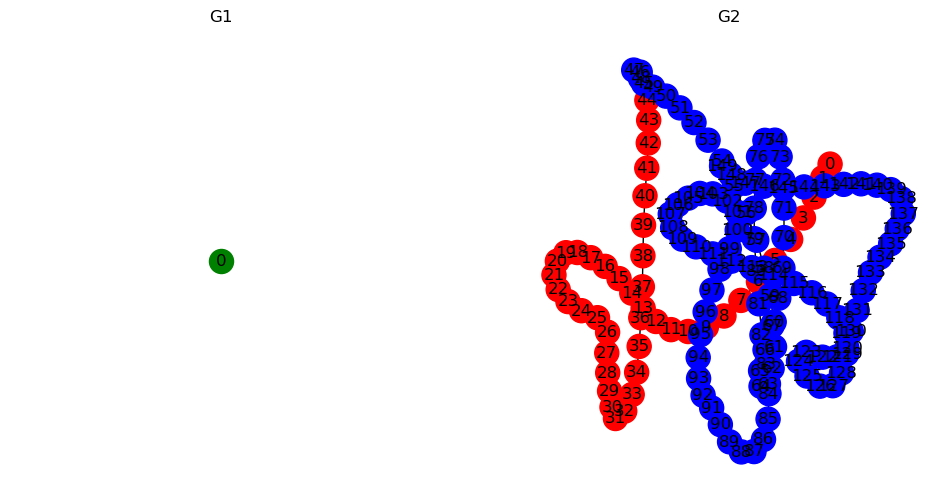

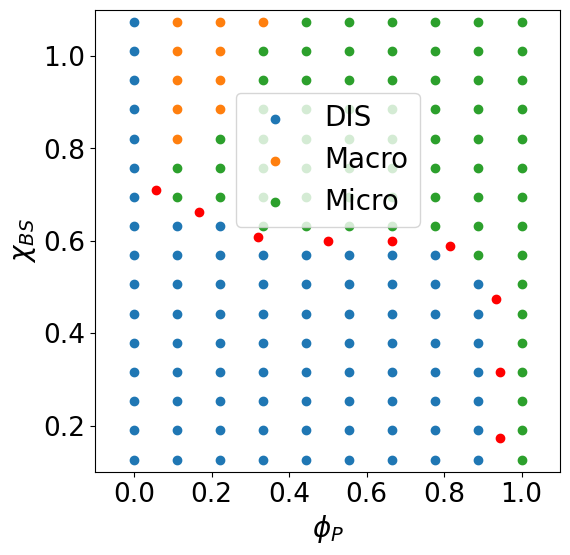

In [83]:
runner = AdditiveWorkFlow(0.1,0.2,'linear',[45,105])
fig = runner.DrawSystem()
phiS_linspace = np.linspace(0.0,1.,10)
chiBS_linspace = np.linspace(0.0, 1.2, 20)
refinement = 10000
n_clusters = 10
max_points = 1000
map_grid = runner.run(phiS_linspace, chiBS_linspace)


fig2 = runner.plot_phase_diagram()
for i in range(refinement):
    midpoint = []
    phase_boundaries,midpoint1 = find_phase_boundaries(map_grid,b_allboundary = False,class_1 = 0,class_2=2)
    midpoint.append(midpoint1)
    midpoint = np.vstack(midpoint)
    #remove any points that are negative
    midpoint = midpoint[midpoint[:,0]>0]
    midpoint = midpoint[midpoint[:,0]<1]
    


    dgrid = runner.run(midpoint[:,0], midpoint[:,1])
    map_grid = np.vstack((map_grid,dgrid))
    if len(map_grid)>max_points:
        break
cluster_centers = reduce_points(midpoint, n_clusters)
cluster_centers = np.vstack(cluster_centers)
#sort using index 2
cluster_centers = cluster_centers[cluster_centers[:,0].argsort()]    
plt.plot(1-cluster_centers[:,0],cluster_centers[:,1],'ro')
plt.xlim(-0.1,1.1)
plt.ylim(0.1,1.1)

N = 150


/home/timothy/anaconda3/envs/env_main/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(0.1, 1.1)

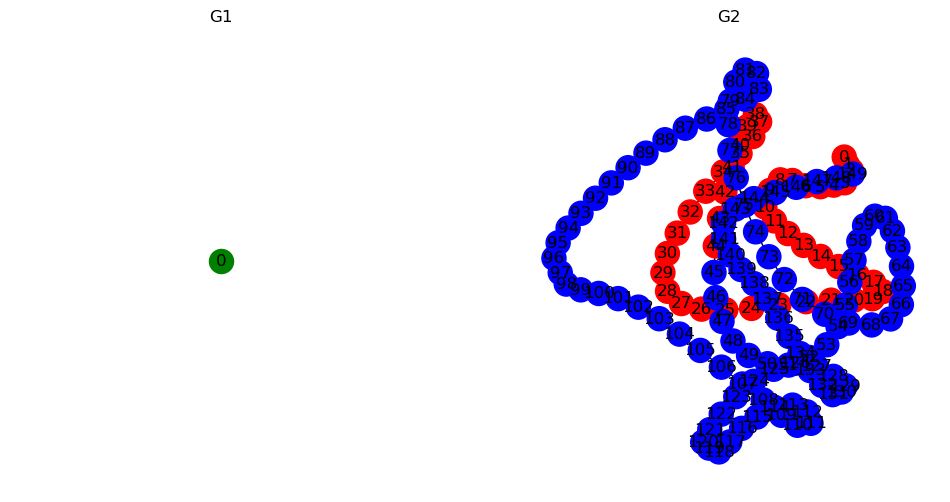

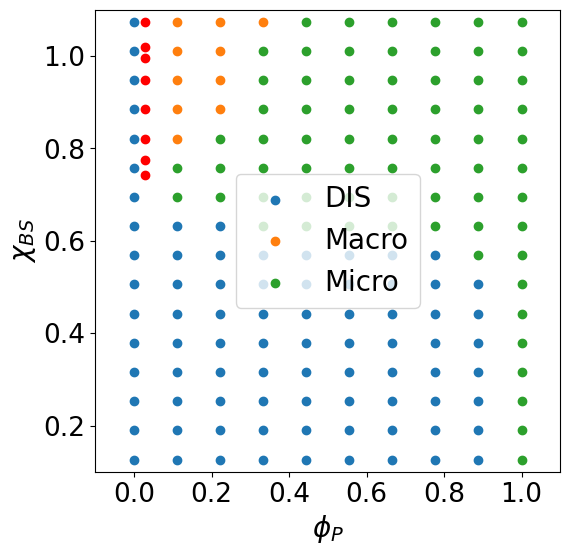

In [84]:
runner = AdditiveWorkFlow(0.1,0.2,'linear',[45,105])
fig = runner.DrawSystem()
phiS_linspace = np.linspace(0.0,1.,10)
chiBS_linspace = np.linspace(0.0, 1.2, 20)
refinement = 10000
n_clusters = 10
max_points = 1000
map_grid = runner.run(phiS_linspace, chiBS_linspace)


fig2 = runner.plot_phase_diagram()
for i in range(refinement):
    midpoint = []
    phase_boundaries,midpoint1 = find_phase_boundaries(map_grid,b_allboundary = False,class_1 = 0,class_2=1)
    midpoint.append(midpoint1)
    midpoint = np.vstack(midpoint)
    #remove any points that are negative
    midpoint = midpoint[midpoint[:,0]>0]
    midpoint = midpoint[midpoint[:,0]<1]
    


    dgrid = runner.run(midpoint[:,0], midpoint[:,1])
    map_grid = np.vstack((map_grid,dgrid))
    if len(map_grid)>max_points:
        break
cluster_centers = reduce_points(midpoint, n_clusters)
cluster_centers = np.vstack(cluster_centers)
#sort using index 2
cluster_centers = cluster_centers[cluster_centers[:,0].argsort()]    
plt.plot(1-cluster_centers[:,0],cluster_centers[:,1],'ro')
plt.xlim(-0.1,1.1)
plt.ylim(0.1,1.1)

N = 150


/home/timothy/anaconda3/envs/env_main/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(0.1, 1.1)

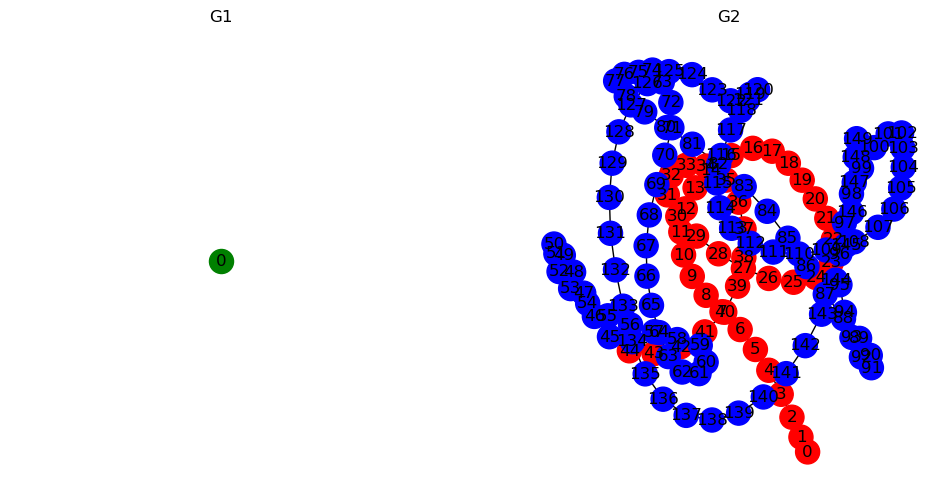

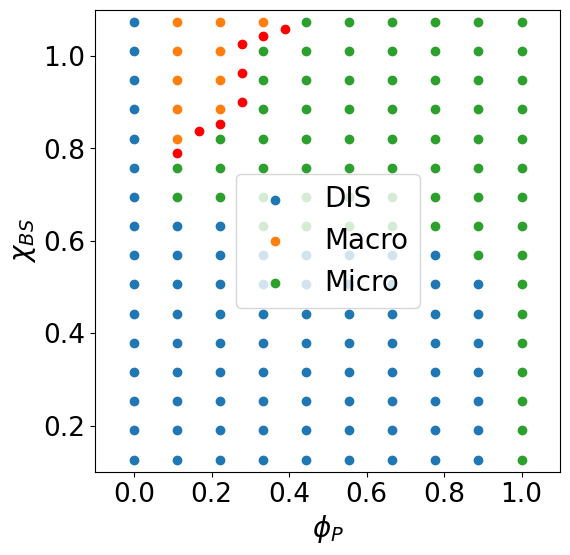

In [85]:
runner = AdditiveWorkFlow(0.1,0.2,'linear',[45,105])
fig = runner.DrawSystem()
phiS_linspace = np.linspace(0.0,1.,10)
chiBS_linspace = np.linspace(0.0, 1.2, 20)
refinement = 10000
n_clusters = 10
max_points = 1000
map_grid = runner.run(phiS_linspace, chiBS_linspace)


fig2 = runner.plot_phase_diagram()
for i in range(refinement):
    midpoint = []
    phase_boundaries,midpoint1 = find_phase_boundaries(map_grid,b_allboundary = False,class_1 = 1,class_2=2)
    midpoint.append(midpoint1)
    midpoint = np.vstack(midpoint)
    #remove any points that are negative
    midpoint = midpoint[midpoint[:,0]>0]
    midpoint = midpoint[midpoint[:,0]<1]
    


    dgrid = runner.run(midpoint[:,0], midpoint[:,1])
    map_grid = np.vstack((map_grid,dgrid))
    if len(map_grid)>max_points:
        break
cluster_centers = reduce_points(midpoint, n_clusters)
cluster_centers = np.vstack(cluster_centers)
#sort using index 2
cluster_centers = cluster_centers[cluster_centers[:,0].argsort()]    
plt.plot(1-cluster_centers[:,0],cluster_centers[:,1],'ro')
plt.xlim(-0.1,1.1)
plt.ylim(0.1,1.1)